<a href="https://colab.research.google.com/github/anastasiablokhina/Data_Visualization_with_Python_and_R/blob/main/lab_2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
install.packages('corrplot')
library(corrplot)
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
music <- read.csv('/content/music_genre.csv', na.string=c('?', 'empty_field'))
music <- filter(music, duration_ms	> 0)
music$instance_id <- as.numeric(music$instance_id) 
music$popularity <- as.numeric(music$popularity )
music$acousticness <- as.numeric(music$acousticness)
music$danceability <- as.numeric(music$danceability)
music$tempo <- as.numeric(music$tempo)
df <- music[sample(nrow(music), 30000),]

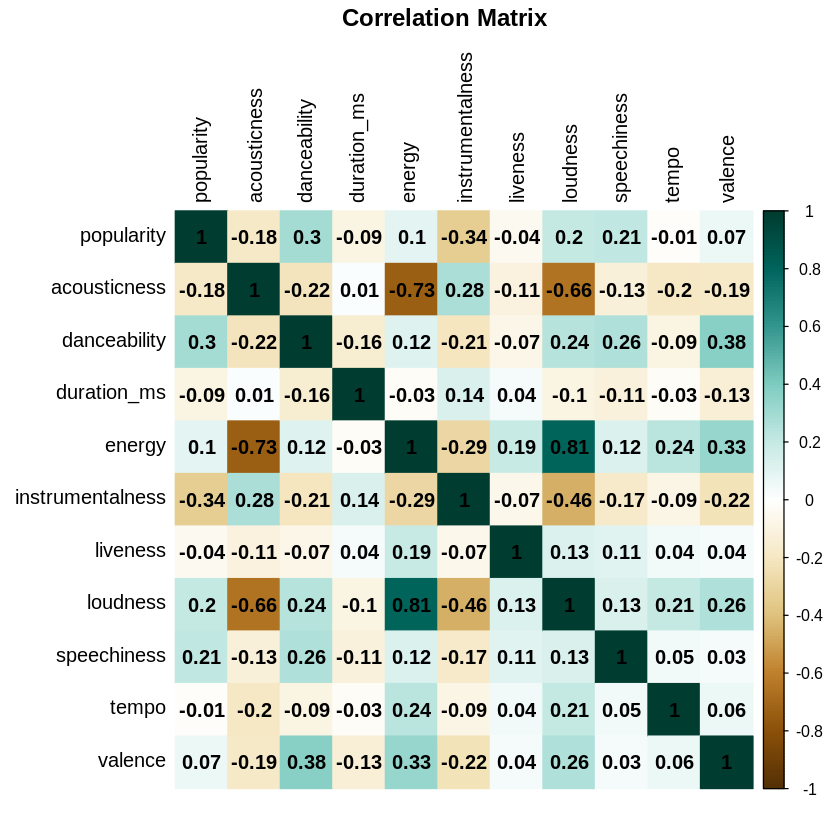

In [ ]:
df_corr <- cor(df[c('popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                     'liveness', 'loudness', 'speechiness', 'tempo', 'valence')], use = "complete.obs")
corrplot(df_corr, method='color', addCoef.col='black', col=COL2('BrBG'), tl.col='black')
title('Correlation Matrix', line = 3)

**Вывод:** Акустические треки чаще всего неэнергичные и негромкие, в то время как энергичным трекам присуща громкость.

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

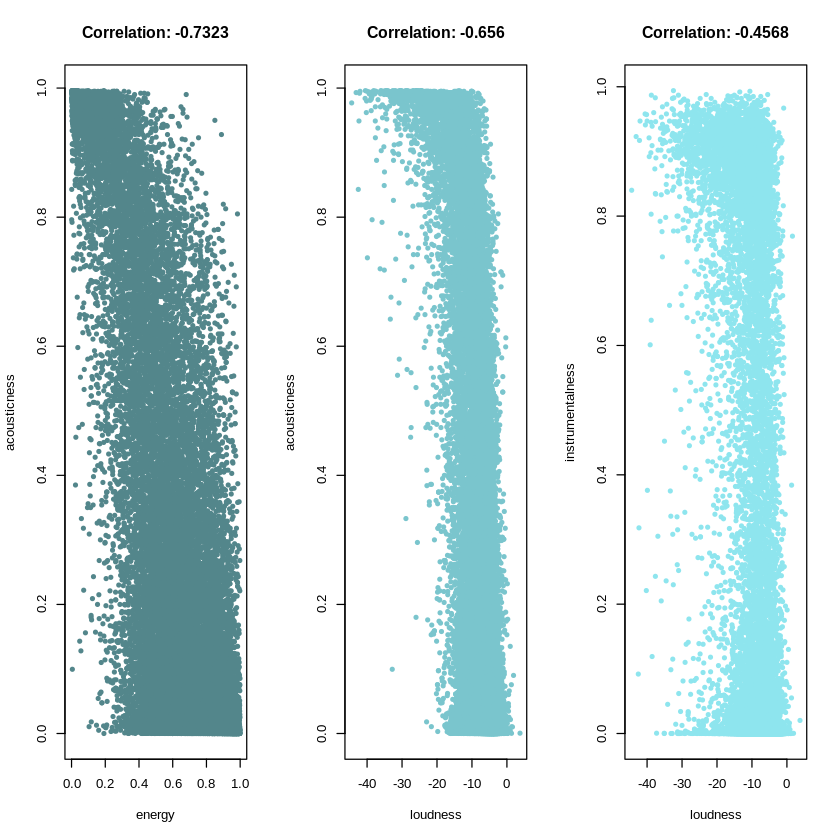

In [ ]:
par(mfrow=c(1,3))
titl = 'Correlation:'
corr_1 = round(cor(df$energy, df$acousticness), 4)
corr_2 = round(cor(df$loudness, df$acousticness), 4)
corr_3 = round(cor(df$loudness, df$instrumentalness), 4)

plot(df$energy, df$acousticness, pch=20, col='cadetblue4', xlab='energy', ylab='acousticness')
title(paste(titl, corr_1))

plot(df$loudness, df$acousticness, pch=20, col='cadetblue3', xlab='loudness', ylab='acousticness')
title(paste(titl, corr_2))

plot(df$loudness, df$instrumentalness, pch=20, col='cadetblue2', xlab='loudness', ylab='instrumentalness')
title(paste(titl, corr_3))

**Вывод:** Между энергичностью и акустичностью наблюдается высокая отрицательная корреляция, между громкостью и акустичностью - средняя, между громкостью и инструментальностью - слабая

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

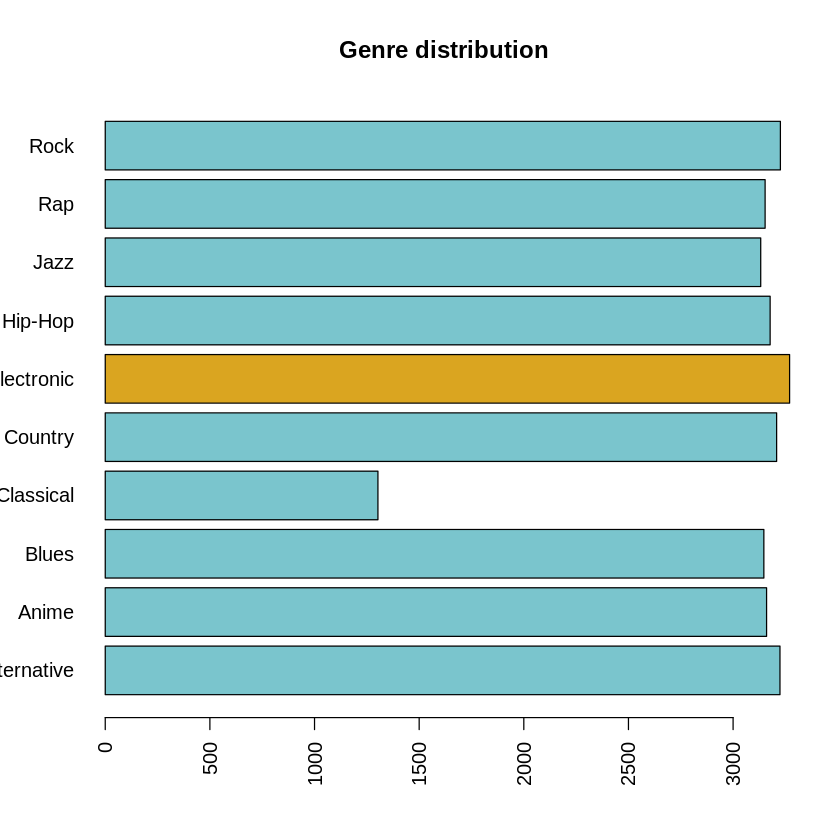

In [ ]:
df_genre <- df %>% count(music_genre)
top_genre <- head(df_genre[order(df_genre$n, decreasing=TRUE), ], n=1)
cols <- c('cadetblue3', 'goldenrod')
pos <- df_genre$music_genre %in% top_genre$music_genre
barplot(height=df_genre$n, names=df_genre$music_genre, horiz=T, col = cols[pos + 1], las = 2)
title('Genre distribution')

**Вывод:** Среди жанров доминирует электронная музыка.

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

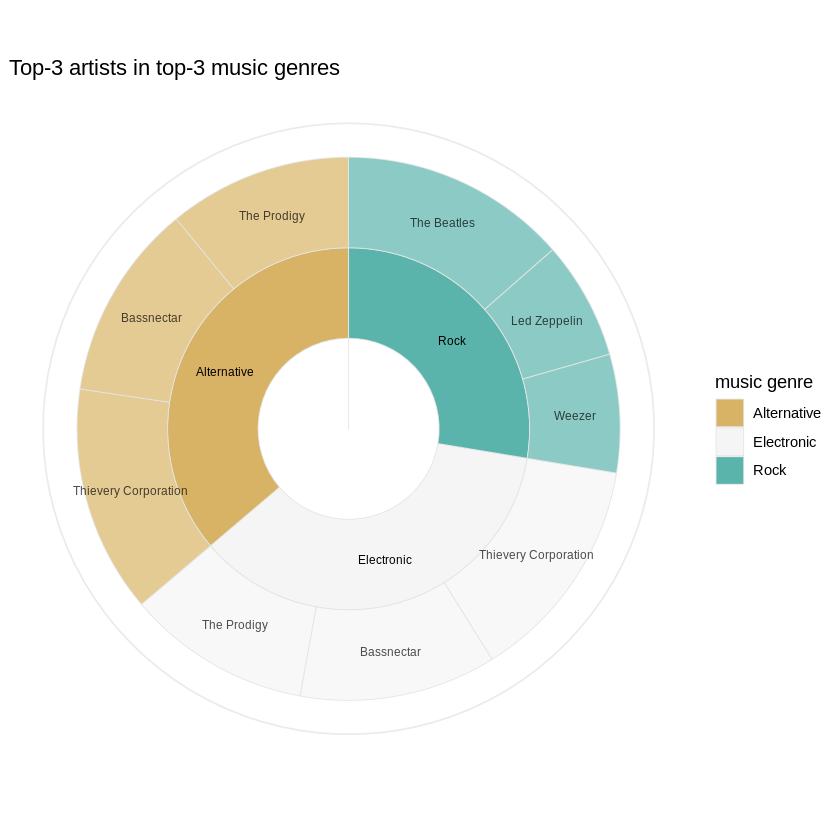

In [ ]:
top3_genre <- head(df_genre[order(df_genre$n, decreasing=TRUE), ], n=3)
top1_df <- filter(df, music_genre == top3_genre$music_genre[1]) %>% count(artist_name) %>% drop_na()
top1 <- head(top1_df[order(top1_df$n, decreasing=TRUE), ], n=3)
top1$music_genre <- top3_genre$music_genre[1]
top2_df <- filter(df, music_genre == top3_genre$music_genre[2]) %>% count(artist_name) %>% drop_na()
top2 <- head(top2_df[order(top2_df$n, decreasing=TRUE), ], n=3)
top2$music_genre <- top3_genre$music_genre[2]
top3_df <- filter(df, music_genre == top3_genre$music_genre[1]) %>% count(artist_name) %>% drop_na()
top3 <- head(top3_df[order(top3_df$n, decreasing=TRUE), ], n=3)
top3$music_genre <- top3_genre$music_genre[3]
top_df <- rbind(top1, top2, top3)
top <- select(top_df, music_genre, artist_name, n)
colnames(top) <- c('name', 'type', 'value')
lvl0 <- tibble(name= '', value = 0, level = 0, fill = NA)
lvl1 <- top %>%
    group_by(name) %>%
    summarise(value = sum(value)) %>%
    ungroup() %>%
    mutate(level = 1) %>%
    mutate(fill = name)
lvl2 <- top %>%
    select(name = type, value, fill = name) %>%
    mutate(level = 2)
bind_rows(lvl0, lvl1, lvl2) %>%
    mutate(name = as.factor(name) %>% fct_reorder2(fill, value)) %>%
    arrange(fill, name) %>%
    mutate(level = as.factor(level)) %>%
    ggplot(aes(x = level, y = value, fill = fill, alpha = level)) +
        geom_col(width = 1, color = "gray90", size = 0.25, position = position_stack()) +
        geom_text(aes(label = name), size = 2.5, position = position_stack(vjust = 0.5)) +
        coord_polar(theta = "y") +
        scale_alpha_manual(values = c("0" = 0, "1" = 1, "2" = 0.7), guide = NULL) +
        scale_x_discrete(breaks = NULL) +
        scale_y_continuous(breaks = NULL) +
        scale_fill_brewer(palette = 'BrBG', na.translate = F) +
        labs(x = NULL, y = NULL, fill = 'music genre') +
        ggtitle('Top-3 artists in top-3 music genres') +
        theme_minimal() 

**Вывод:** В жанре рок большая часть треков принадлежит группе The Beatles, дуэту Thievery Corporation принадлежит большая часть треков как в электронике, так и в альтернативе.

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

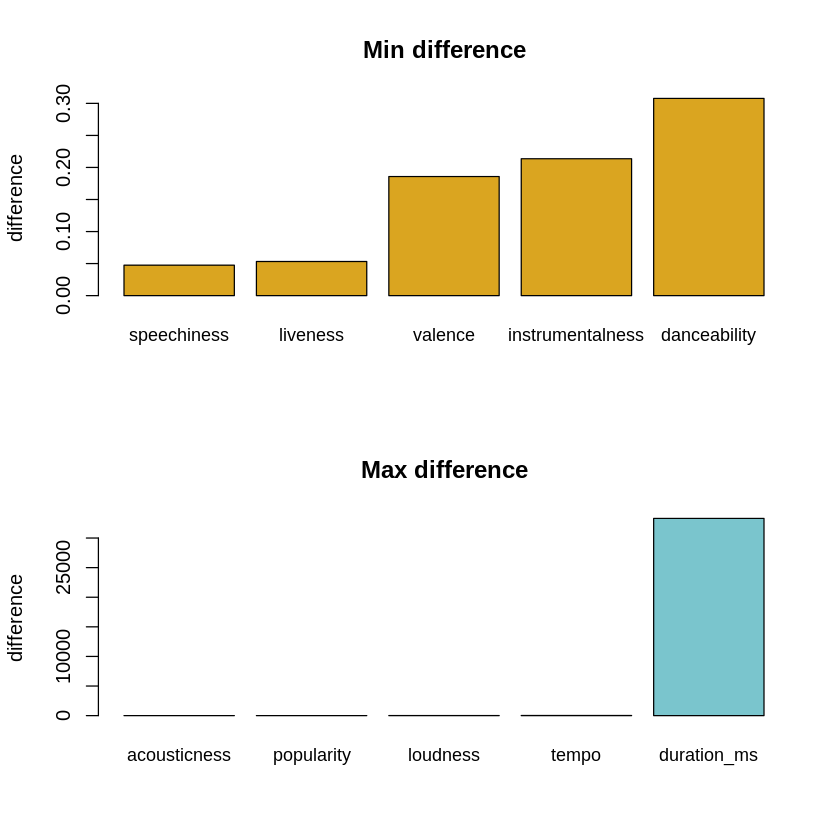

In [ ]:
sort_df_genre <- df_genre[order(df_genre$n, decreasing=TRUE), ]
mst_pop <- df[df$music_genre == sort_df_genre$music_genre[1],][2:18]
mst_pop <- select_if(mst_pop, is.numeric) %>% summarise_each(funs( mean( .,na.rm = TRUE)))
lst_pop <- df[df$music_genre == sort_df_genre$music_genre[10],][2:18]
lst_pop <- select_if(lst_pop, is.numeric) %>% summarise_each(funs( mean( .,na.rm = TRUE)))
diff <- t(abs(mst_pop[1,] - lst_pop[1,]))
sort_diff <- diff[order(diff[,1]), ]
top5 <- tail(data.frame(sort_diff), n=5)
bed5 <- head(data.frame(sort_diff), n=5)

par(mfrow=c(2,1))
barplot(height=bed5[, 1], names=rownames(bed5), col='goldenrod', ylab='difference', cex.names=0.9)
title('Min difference')
barplot(height=top5[, 1], names=rownames(top5), col='cadetblue3', ylab='difference', cex.names=0.9)
title('Max difference')


**Вывод:** Максимальная разница между жанрами электроника и классическая музыка достигается в характеристике "длительность", минимальная - в характеристике, отвечающей за количество текста.

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

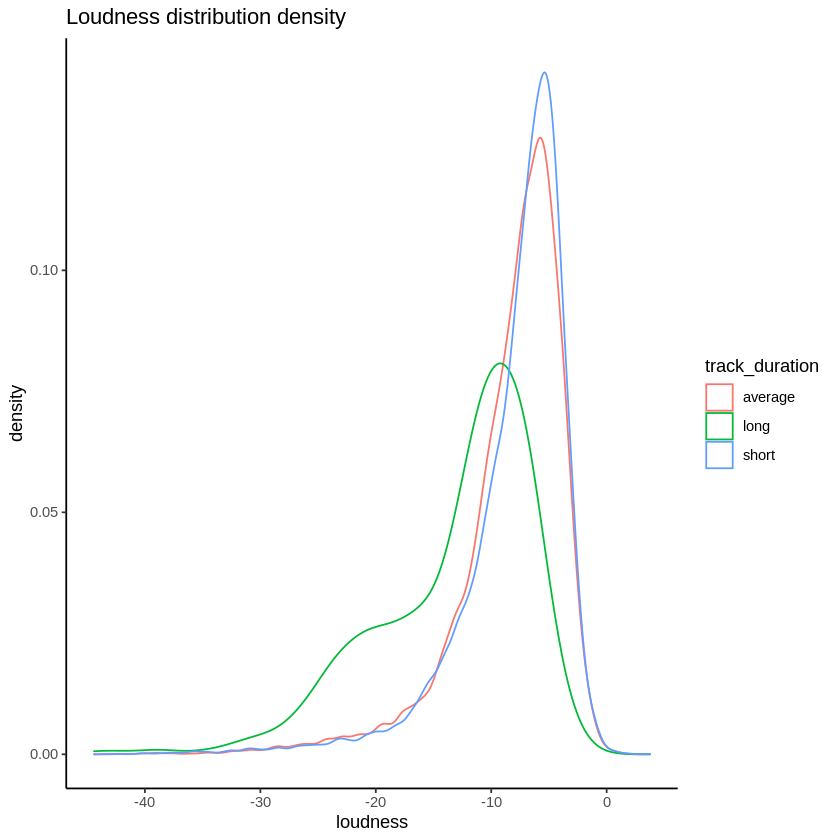

In [ ]:
df_short <- add_column(df[df$duration_ms < 240000,], track_duration='short')
df_average <- add_column(df[df$duration_ms >= 240000 & df$duration_ms < 480000,], track_duration='average')
df_long <- add_column(df[df$duration_ms >= 480000,], track_duration='long')
df_distr <- rbind(df_short, df_average, df_long)
ggplot(df_distr, aes(x=loudness, color=track_duration)) +  geom_density() + theme_classic() + ggtitle('Loudness distribution density')

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

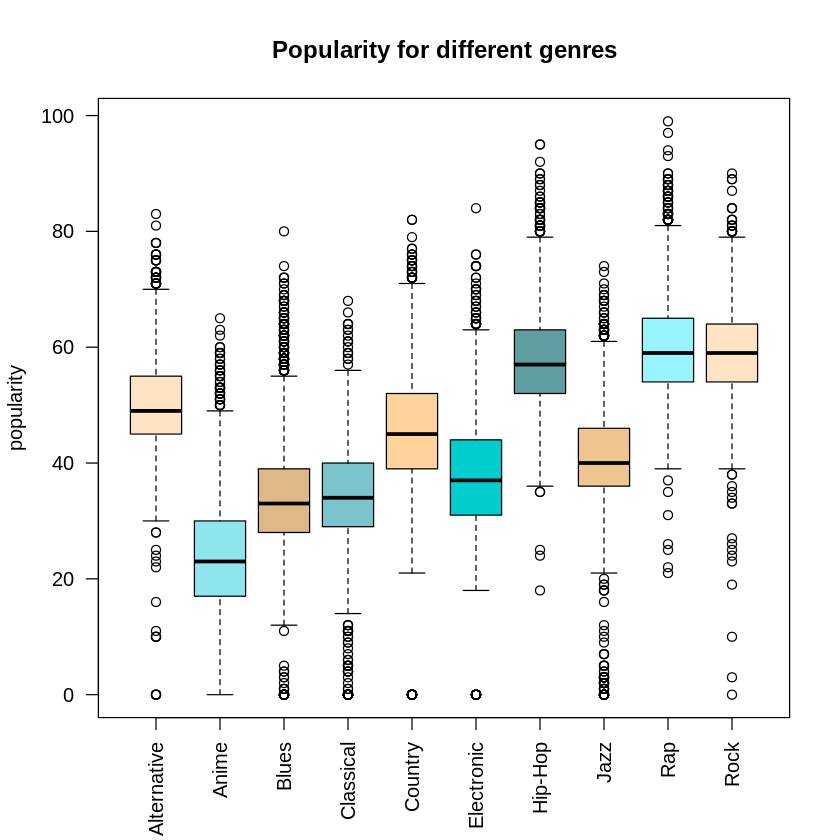

In [ ]:
boxplot(popularity ~ music_genre, data = df,
        ylab = 'popularity',  xlab='', las = 2,
        main = 'Popularity for different genres',
        col = c('bisque1', 'cadetblue2', 'burlywood', 'cadetblue3', 'burlywood1',
                'cyan3','cadetblue', 'burlywood2', 'cadetblue1', 'bisque'))


**Вывод:** При сопоставлении медианной популярности различных жанров музыки, можно увидеть сходство между:
*  классической музыкой и блюзом
*  рэпом, роком и хип-хоп музыкой

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

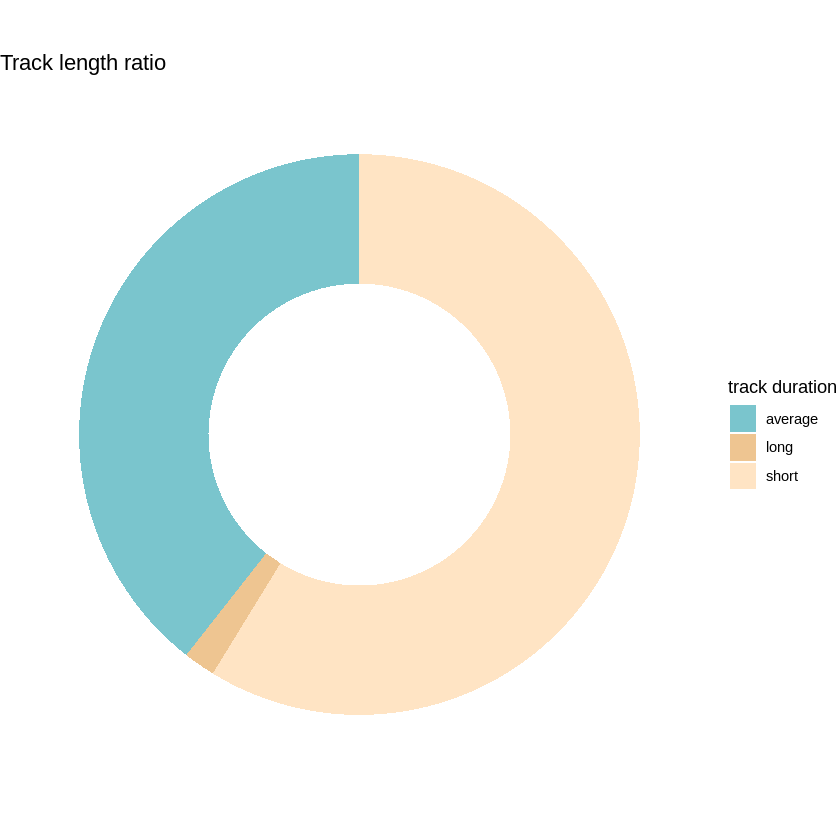

In [ ]:
df_donut <- df_distr %>% count(track_duration)
slice_colors = c('cadetblue3', 'burlywood2', 'bisque')
ggplot(df_donut, aes(x = 2, y = n, fill = track_duration)) +
    geom_bar(stat = 'identity') +
    coord_polar(theta = "y", start = 0) + 
    theme_void() + 
    labs(fill = 'track duration') +
    xlim(0.5, 2.5) +
    ggtitle('Track length ratio') +
    scale_fill_manual(values = slice_colors)

**Вывод:** Больше всего коротких треков, меньше всего - длинных.